# PAC with datasets from CERN opendata
## PCA & packages

In [1]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
import io

## Data

In [2]:
data = pd.read_csv('training.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

In [4]:
print(data.head())
print(data.shape)

   EventId  DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
0   100000       138.470                       51.655        97.827    27.980   
1   100001       160.937                       68.768       103.235    48.146   
2   100002      -999.000                      162.172       125.953    35.635   
3   100003       143.905                       81.417        80.943     0.414   
4   100004       175.864                       16.915       134.805    16.405   

   DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
0                  0.91           124.711                2.666   
1               -999.00          -999.000             -999.000   
2               -999.00          -999.000             -999.000   
3               -999.00          -999.000             -999.000   
4               -999.00          -999.000             -999.000   

   DER_deltar_tau_lep  DER_pt_tot  ...  PRI_jet_num  PRI_jet_leading_pt  \
0               3.064      41.928  ...   

In [5]:
data.dropna(inplace=True)  #只要資料有nan就刪除
print(data)

        EventId  DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  \
0        100000       138.470                       51.655        97.827   
1        100001       160.937                       68.768       103.235   
2        100002      -999.000                      162.172       125.953   
3        100003       143.905                       81.417        80.943   
4        100004       175.864                       16.915       134.805   
...         ...           ...                          ...           ...   
249995   349995      -999.000                       71.989        36.548   
249996   349996      -999.000                       58.179        68.083   
249997   349997       105.457                       60.526        75.839   
249998   349998        94.951                       19.362        68.812   
249999   349999      -999.000                       72.756        70.831   

        DER_pt_h  DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
0     

In [6]:
pca = PCA(n_components = 0.95)
n_data = preprocessing.scale(data)
print(n_data)

z=pca.fit_transform(n_data)

print('pca後維度:',pca.n_components_)

ValueError: could not convert string to float: 's'

In [ ]:
np.sum(pca.explained_variance_ratio_)#它代表降维後的各主成分的方差值占總方差值的比例，這個比例越大，則越是重要的主成分。

In [ ]:
np.sum(pca.explained_variance_)#它代表降维后的各主成分的方差值。方差值越大，則說明越是重要的主成分

In [ ]:
#(資料筆數，維度)
print('z.shape :',z.shape)
print('data.shape :',n_data.shape)

In [7]:
print(z)

NameError: name 'z' is not defined

## Visualization

AttributeError: 'PCA' object has no attribute 'explained_variance_ratio_'

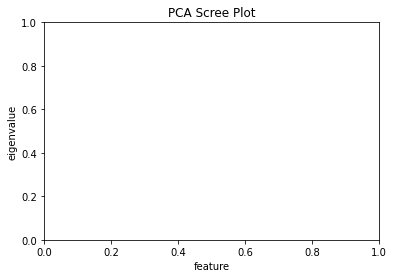

In [8]:
plt.ylabel('eigenvalue')
plt.xlabel('feature')
plt.title('PCA Scree Plot')
#plt.ylim(0,1)
#plt.style.context('seaborn-whitegrid')
#plt.axhline(y=1,color='r',linestyle='--')
plt.plot(pca.explained_variance_ratio_,'o-',linewidth=1,color='blue')
print(pca.explained_variance_ratio_)
print('\n全部加總:',sum(pca.explained_variance_ratio_))
plt.show()

In [ ]:
plt.ylabel('eigenvalue')
plt.xlabel('feature')
plt.title('PCA Scree Plot')
#plt.ylim(0,1)
#plt.style.context('seaborn-whitegrid')
#plt.axhline(y=1,color='r',linestyle='--')
plt.plot(pca.explained_variance_,'o-',linewidth=1,color='blue')
print(pca.explained_variance_)
print('\n全部加總:',sum(pca.explained_variance_))
plt.show()